In [1]:
import cv2
import numpy
import matplotlib.pyplot as plt
from glob import glob
from os import path

In [2]:
from skimage.color import *
from skimage.util import *

In [3]:
from pandas import DataFrame

In [4]:
def show_image(my_image):
    fig, ax = plt.subplots(dpi=120)
    ax.imshow(my_image)
    ax.axis('off')
    plt.show()

In [5]:
def load_image(image_file):
    img_bgr = cv2.imread(image_file)
    my_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
    return my_image

In [6]:
def is_low_contrast(obj_image, fraction_threshold=0.05, lower_percentile=1,
                    upper_percentile=99, method='linear'):
    dlimits = dtype_limits(obj_image, clip_negative=False)
    limits = numpy.percentile(obj_image, [lower_percentile, upper_percentile])
    
    ratio = (limits[1] - limits[0]) / (dlimits[1] - dlimits[0])

    return ratio < fraction_threshold, ratio

In [7]:
def get_low_contrast(fraction_threshold, lower_percentile, upper_percentile):
    global obj_images
    
    low_contrast_ratios = dict()

    for obj_name in obj_images:
        obj = obj_images[obj_name]

        low_contrast, ratio = is_low_contrast(obj, fraction_threshold=fraction_threshold,
                                                   lower_percentile=lower_percentile, 
                                                   upper_percentile=upper_percentile)
        if not low_contrast:
            low_contrast_ratios[obj_name] = ratio
        else:
            low_contrast_ratios[obj_name] = -1.0

    return low_contrast_ratios

In [8]:
def get_contrast_ratios():
    global obj_images
    
    low_contrast_ratios = dict()

    for obj_name in obj_images:
        obj = obj_images[obj_name]

        obj_flat = obj.flatten()
        obj_flat_norm = (obj_flat - obj_flat.mean())/(obj_flat.std())
        obj_flat_sort = numpy.sort(numpy.unique(obj_flat_norm))
        obj_flat_sort_diff = numpy.diff(obj_flat_sort)
        
        ratio = obj_flat_sort_diff[-1] - obj_flat_sort_diff[1]
        low_contrast_ratios[obj_name] = ratio

    return low_contrast_ratios

<h3>環境設置</h3>

In [9]:
image_folder = 'D:/Projects/ComputerVision/AutoEncoder/Fish/images/full'
image_files = [ f[len(image_folder) + 1:] for f in sorted(glob('%s/F*.jpg' % (image_folder)))]

image_files[:5]

['F000055.jpg', 'F000056.jpg', 'F000057.jpg', 'F000058.jpg', 'F000059.jpg']

<h3>轉換資料格式</h3>

In [10]:
obj_images = dict()

for image_file in image_files:
    _image_file = '%s/%s' % (image_folder, image_file)

    my_image = load_image(_image_file)
    _image = rgb2gray(numpy.asanyarray(my_image))
    
    obj_images[image_file] = _image

<h3>驗證構想</h3>

<h3>設定基礎閥值，計算模糊影像個數</h3>

In [11]:
low_contrast_ratios = get_low_contrast(fraction_threshold=0.1, lower_percentile=5, upper_percentile=95)

In [12]:
low_contrast_ratios_df = DataFrame(data={ 'Ratio': low_contrast_ratios.values() },
                                          index=low_contrast_ratios.keys()
                                  )

low_contrast_count = low_contrast_ratios_df.loc[low_contrast_ratios_df['Ratio']==-1].count()

print('OBSCURE=%4d\tCLEAR=%4d' % (
    low_contrast_count.values[0], 
    low_contrast_ratios_df.shape[0] - low_contrast_count.values[0]))

low_contrast_ratios_df.to_csv('Low_Contrast_Ratios_10_5_95.csv', 
                              index=True, index_label='IMAGE_ID')

CLEAR= 742	OBSCURE=1555


<h3>提高閥值，亦會增加模糊影像個數</h3>

In [13]:
low_contrast_ratios = get_low_contrast(fraction_threshold=0.15, lower_percentile=5, upper_percentile=95)

In [14]:
low_contrast_ratios_df = DataFrame(data={ 'Ratio': low_contrast_ratios.values() },
                                          index=low_contrast_ratios.keys()
                                  )

low_contrast_count = low_contrast_ratios_df.loc[low_contrast_ratios_df['Ratio']==-1].count()

print('OBSCURE=%4d\tCLEAR=%4d' % (
    low_contrast_count.values[0], 
    low_contrast_ratios_df.shape[0] - low_contrast_count.values[0]))

low_contrast_ratios_df.to_csv('Low_Contrast_Ratios_15_5_95.csv', 
                              index=True, index_label='IMAGE_ID')

CLEAR=1893	OBSCURE= 404


<h3>提高閥值，亦會增加模糊影像個數</h3>

In [15]:
low_contrast_ratios = get_low_contrast(fraction_threshold=0.20, lower_percentile=5, upper_percentile=95)

In [16]:
low_contrast_ratios_df = DataFrame(data={ 'Ratio': low_contrast_ratios.values() },
                                          index=low_contrast_ratios.keys()
                                  )

low_contrast_count = low_contrast_ratios_df.loc[low_contrast_ratios_df['Ratio']==-1].count()

print('OBSCURE=%4d\tCLEAR=%4d' % (
    low_contrast_count.values[0], 
    low_contrast_ratios_df.shape[0] - low_contrast_count.values[0]))

low_contrast_ratios_df.to_csv('Low_Contrast_Ratios_20_5_95.csv', 
                              index=True, index_label='IMAGE_ID')

CLEAR=2290	OBSCURE=   7


<h3>調高低區間百分位，會增加模糊影像個數</h3>

In [17]:
low_contrast_ratios = get_low_contrast(fraction_threshold=0.20, lower_percentile=15, upper_percentile=95)

In [18]:
low_contrast_ratios_df = DataFrame(data={ 'Ratio': low_contrast_ratios.values() },
                                          index=low_contrast_ratios.keys()
                                  )

low_contrast_count = low_contrast_ratios_df.loc[low_contrast_ratios_df['Ratio']==-1].count()

print('OBSCURE=%4d\tCLEAR=%4d' % (
    low_contrast_count.values[0], 
    low_contrast_ratios_df.shape[0] - low_contrast_count.values[0]))

low_contrast_ratios_df.to_csv('Low_Contrast_Ratios_20_15_95.csv', 
                              index=True, index_label='IMAGE_ID')

CLEAR=2297	OBSCURE=   0


<h3>縮減高區間百分位，會增加模糊影像個數</h3>

In [19]:
low_contrast_ratios = get_low_contrast(fraction_threshold=0.20, lower_percentile=5, upper_percentile=85)

In [20]:
low_contrast_ratios_df = DataFrame(data={ 'Ratio': low_contrast_ratios.values() },
                                          index=low_contrast_ratios.keys()
                                  )

low_contrast_count = low_contrast_ratios_df.loc[low_contrast_ratios_df['Ratio']==-1].count()

print('OBSCURE=%4d\tCLEAR=%4d' % (
    low_contrast_count.values[0], 
    low_contrast_ratios_df.shape[0] - low_contrast_count.values[0]))

low_contrast_ratios_df.to_csv('Low_Contrast_Ratios_20_5_85.csv', 
                              index=True, index_label='IMAGE_ID')

CLEAR=2297	OBSCURE=   0


In [21]:
low_contrast_count.values[0]

2297

<h3>計算灰階梯度</h3>

In [22]:
low_contrast_ratios = get_contrast_ratios()
ratios_df = DataFrame(data={ 'Ratio_Norm': low_contrast_ratios.values() }, 
                      index=low_contrast_ratios.keys())

In [23]:
ratios_df.sort_values(['Ratio_Norm'])

,Ratio_Norm
F015790.jpg,-0.536452
F000292.jpg,-0.510930
F000277.jpg,-0.464239
F004474.jpg,-0.368381
F014074.jpg,-0.338859
...,...
F016872.jpg,0.907791
F009182.jpg,0.998889
F007134.jpg,1.097398
F012684.jpg,1.111298


In [24]:
ratios_df.to_csv('Low_Contrast_Ratios.csv', index=True, index_label='IMAGE_ID')

(-1.96, 1.96)

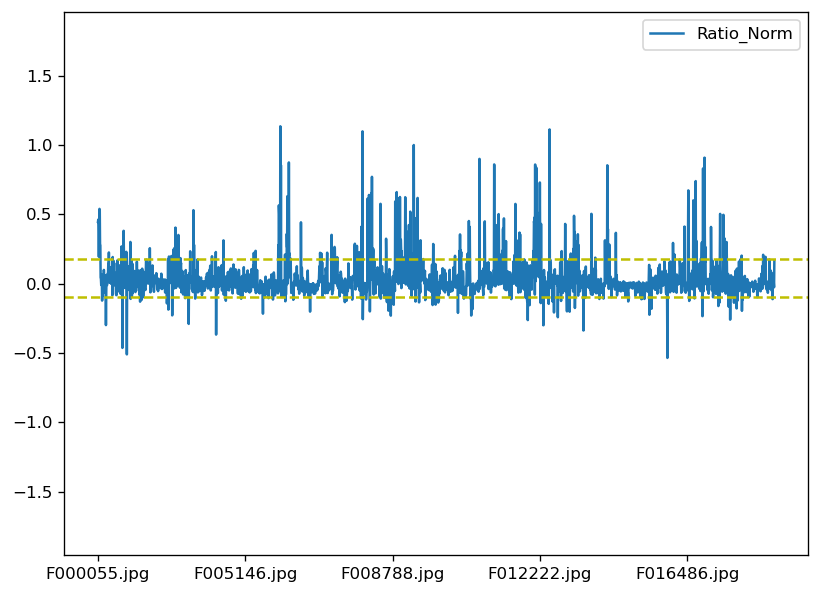

In [36]:
fig, ax = plt.subplots(dpi=120, figsize=(8, 6))

ratios_df.plot(ax=ax)

ul = ratios_df['Ratio_Norm'].mean() + ratios_df['Ratio_Norm'].std()
dl = ratios_df['Ratio_Norm'].mean() - ratios_df['Ratio_Norm'].std()

ax.axhline(y=ul, color='y', linestyle='--')
ax.axhline(y=dl, color='y', linestyle='--')

plt.ylim([-1.96, +1.96])

array([<AxesSubplot:title={'center':'Ratio_Norm'}>], dtype=object)

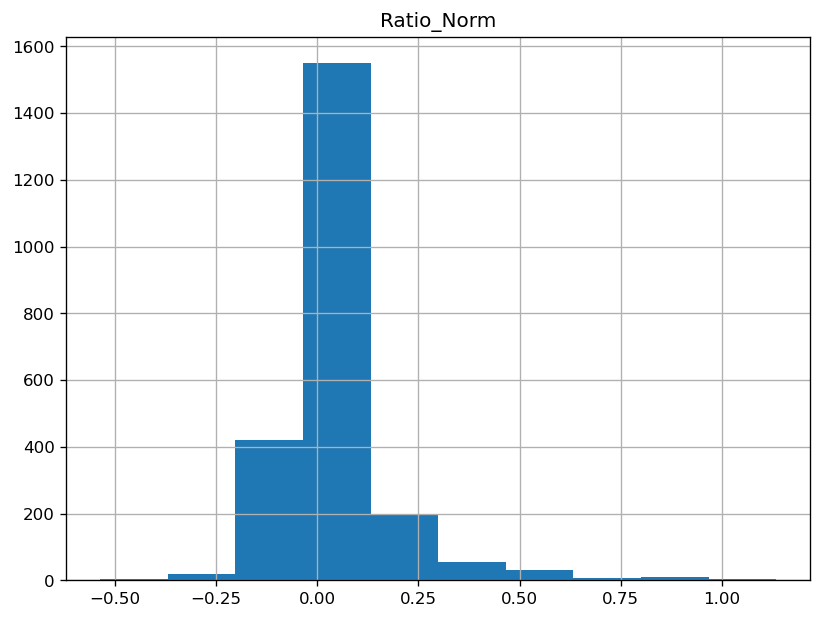

In [37]:
fig, ax = plt.subplots(dpi=120, figsize=(8, 6))

ratios_df.hist(ax=ax)

(array([9.98846e+05, 9.56854e+05, 8.18910e+04, 2.17740e+04, 8.17800e+03,
        4.14900e+03, 1.83200e+03, 7.60000e+01]),
 array([-1.9516775 , -0.21829807,  1.51508137,  3.2484608 ,  4.98184023,
         6.71521966,  8.44859909, 10.18197852, 11.91535796]),
 <BarContainer object of 8 artists>)

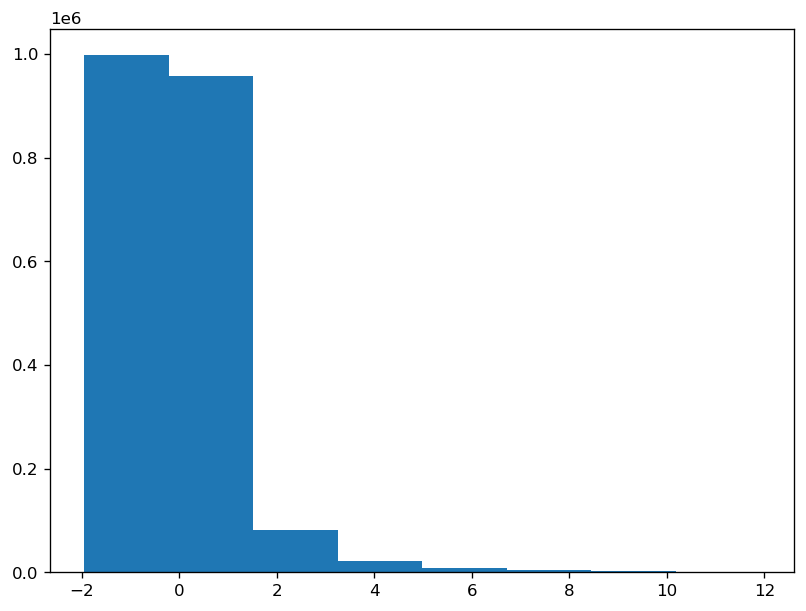

In [39]:
fig, ax = plt.subplots(dpi=120, figsize=(8, 6))

obj = obj_images['F000057.jpg']

obj_flat = obj.flatten()
obj_flat_norm = (obj_flat - obj_flat.mean()) / (obj_flat.std())

ax.hist(obj_flat_norm, bins=8)